<html>
<body>
    <div class="image-container" style="display: flex;">
        <img src="https://ufal.br/ufal/resolveuid/5ba5577fc45f41f48a6e8e9311488b28" alt="Image 1" style="width: 15%; height: auto;">
        <img src="https://ic.ufal.br/site-logo" alt="Image 2" style="width: 15%; height: auto;">
    </div>
   <h1 align="center"> Redes Neurais e Aprendizado Profundo - 2023.1 </h1>
   <h2 align="center"> Professor: Tiago Figueiredo Vieira </h2>
</body>
</html>

---

# Classification using Perceptrons

The following graph shows the distribution of samples (features $x_1$ and $x_2$) related to 3 (three) categories. In this exercise, solve the following questions:

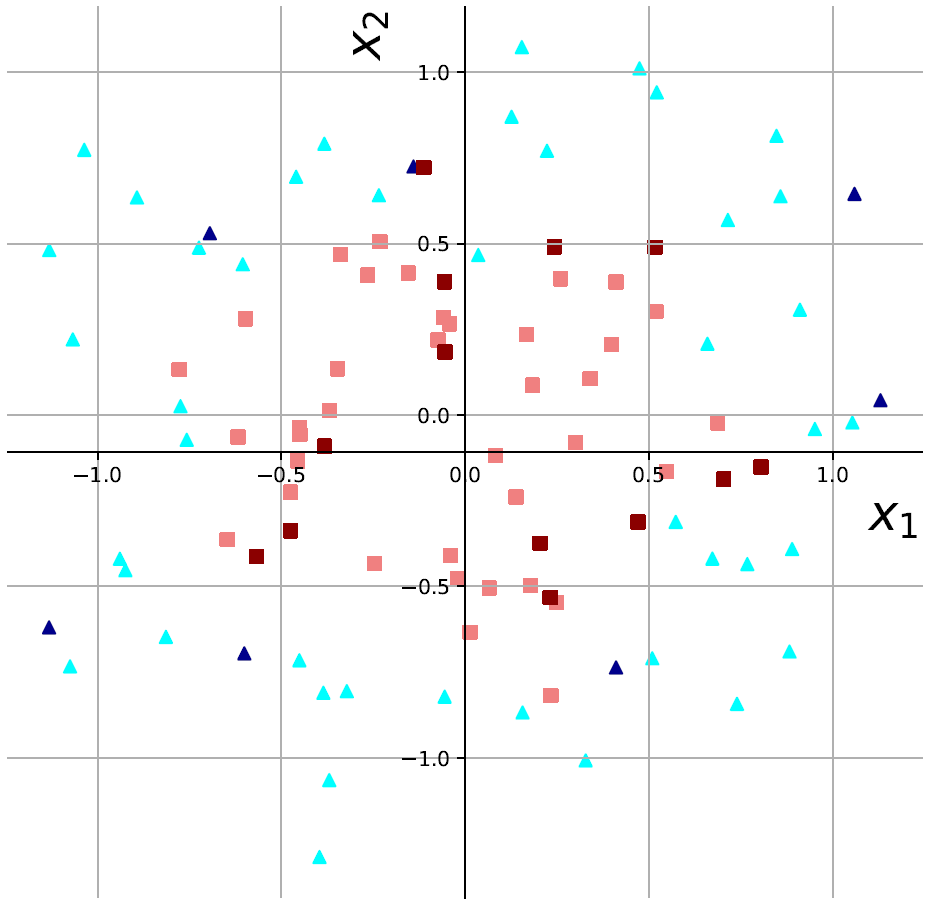

## Part 1

With the Perceptron you developed using only Numpy, provide a model capable of reasonably classifying such samples. Obs: For training procedure, use files (which are represented by light red, light green and cyan in the graph);

| Samples | Labels |
|---|---|
| X_train.npy | y_train.npy |

And for testing, use the following files (which are represented by dark blue, dark green and dark red in the graph):

| Samples | Labels |
|---|---|
| X_test.npy | y_test.npy |

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

y_test_orig = y_test

In [3]:
print("Shape X_train:", str(X_train.shape))
print("Shape y_tain:", str(y_train.shape))

Shape X_train: (124, 13)
Shape y_tain: (124,)


In [4]:
# Criando os dados para OneVsAll

y_train_0 = np.where(y_train == 2, 3, y_train)
y_train_0 = np.where(y_train_0 == 1, 3, y_train_0)
y_train_0 = np.where(y_train_0 == 0, 1, y_train_0)
y_train_0 = np.where(y_train_0 == 3, 0, y_train_0)

y_train_1 = np.where(y_train == 2, 0, y_train)

y_train_2 = np.where(y_train == 1, 0, y_train)
y_train_2 = np.where(y_train_2 == 2, 1, y_train_2)

In [5]:
class Perceptron:
    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) # Sigmoid
    
    def fit(self, X, y):     
        num_features = X.shape[1]
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            
            predictions = self.sigmoid(z)
            
            dw = (1 / len(X)) * np.dot(X.T, (predictions - y))
            db = (1 / len(X)) * np.sum(predictions - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):       
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return predictions

In [6]:
perceptron0 = Perceptron(0.01, 2000)
perceptron1 = Perceptron(0.01, 2000)
perceptron2 = Perceptron(0.01, 2000)

perceptron0.fit(X_train, y_train_0)
perceptron1.fit(X_train, y_train_1)
perceptron2.fit(X_train, y_train_2)

/tmp/ipykernel_167127/1130458316.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z)) # Sigmoid


In [7]:
prediction0 = perceptron0.predict(X_test)
prediction1 = perceptron1.predict(X_test)
prediction2 = perceptron2.predict(X_test)

'''print("########################################")
print(prediction0)
print("########################################")
print(prediction1)
print("########################################")
print(prediction2)'''

results = []

for i in range(len(prediction0)):
    results.append(np.argmax([
        prediction0[i],
        prediction1[i],
        prediction2[i]
    ]))

print(results)

[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1]


/tmp/ipykernel_167127/1130458316.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z)) # Sigmoid


In [8]:
def accuracy(predictions, y_test):
    classifications = len(y_test)
    correct_classifications = sum(p == r for p, r in zip(predictions, y_test))
    return correct_classifications / classifications

# Por padrão utilizar os nomes 'predictions' e 'y_test'

predictions = [1, 1, 1, 1, 1]
y_test = [1, 1, 2, 1, 1]

In [9]:
predictions = results
y_test = y_test_orig

print(accuracy(predictions, y_test))

0.7222222222222222


In [10]:
assert accuracy(predictions, y_test) > 0.55

## Part 2

**Perform some linear data transformation** that you believe might cause an improvement in the classification's training and testing performances.

In [11]:
X_train_cropped = X_train[:, [0, 5]]
X_test_cropped = X_test[:, [0, 5]]

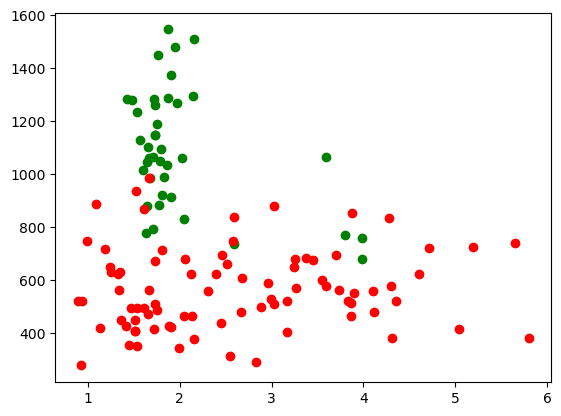

In [12]:
class_to_color = {
    0: 'red',
    1: 'green',
}

for i in range(len(y_train)):
    plt.scatter(X_train[:, 1][i], X_train[:, 12][i], c=class_to_color[y_train_0[i]])

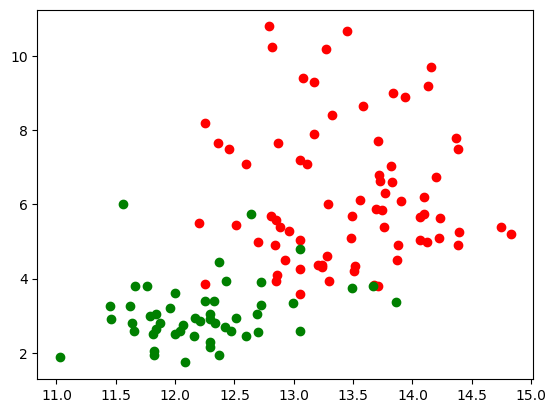

In [13]:
for i in range(len(y_train)):
    plt.scatter(X_train[:, 0][i], X_train[:, 9][i], c=class_to_color[y_train_1[i]])

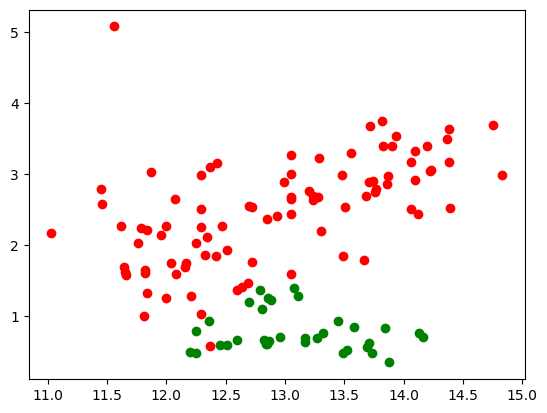

In [14]:
for i in range(len(y_train)):
    plt.scatter(X_train[:, 0][i], X_train[:, 6][i], c=class_to_color[y_train_2[i]])

In [15]:
perceptron0 = Perceptron(0.01, 2000)
perceptron1 = Perceptron(0.01, 2000)
perceptron2 = Perceptron(0.01, 2000)

perceptron0.fit(X_train, y_train_0)
perceptron1.fit(X_train[:, [0, 9]], y_train_1)
perceptron2.fit(X_train[:, [0, 6]], y_train_2)

/tmp/ipykernel_167127/1130458316.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z)) # Sigmoid


In [16]:
prediction0 = perceptron0.predict(X_test)
prediction1 = perceptron1.predict(X_test[:, [0, 9]])
prediction2 = perceptron2.predict(X_test[:, [0, 6]])

'''print("########################################")
print(prediction0)
print("########################################")
print(prediction1)
print("########################################")
print(prediction2)'''

results = []

for i in range(len(prediction0)):
    results.append(np.argmax([
        prediction0[i],
        prediction1[i],
        prediction2[i]
    ]))

print(results)

[1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2]


/tmp/ipykernel_167127/1130458316.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z)) # Sigmoid


In [17]:
def accuracy(predictions, y_test):
    classifications = len(y_test)
    correct_classifications = sum(p == r for p, r in zip(predictions, y_test))
    return correct_classifications / classifications

# Por padrão utilizar os nomes 'predictions' e 'y_test'

predictions = results
y_test = y_test_orig

print(accuracy(predictions, y_test))

0.9444444444444444


In [18]:
assert accuracy(predictions, y_test) > 0.55